# Simple Linear Regression

In [82]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
%matplotlib inline

In [ ]:
#get the dataset from kaggle
os.system("kaggle datasets download -d burnoutminer/heights-and-weights-dataset")
os.system("unzip heights-and-weights-dataset.zip")

# Load into pandas


Dataset URL: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset
License(s): other
heights-and-weights-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heights-and-weights-dataset.zip


replace SOCR-HeightWeight.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


In [22]:
df = pd.read_csv("SOCR-HeightWeight.csv"
                 )
print(df.head())

   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


In [23]:
df['Height(cm)'] = df['Height(Inches)']*2.56

In [24]:
df['Weight(Kg)'] = df['Weight(Pounds)']*0.453

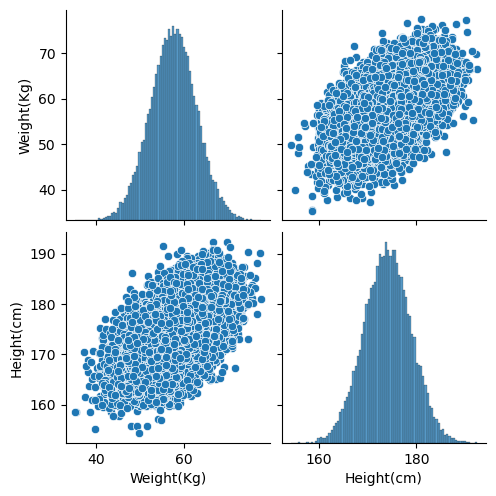

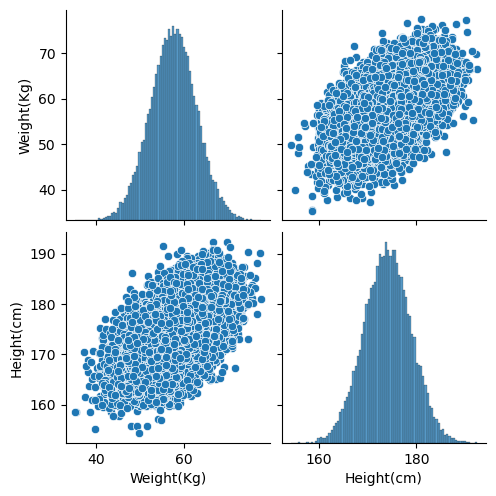

In [85]:
sns.pairplot(df[['Weight(Kg)', 'Height(cm)']])
plt.show()

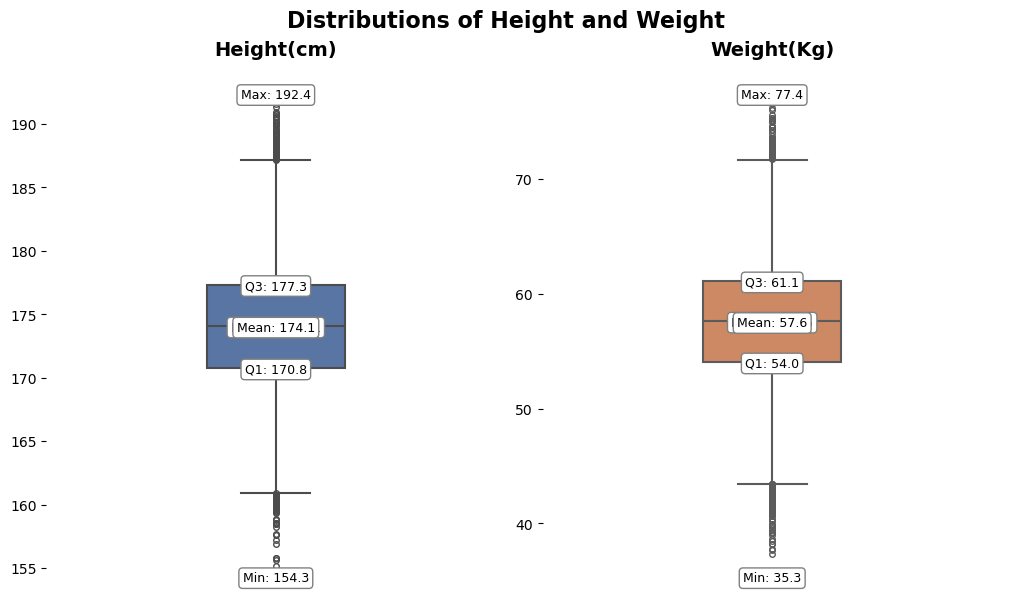

In [91]:
# Columns to visualize
columns = ['Height(cm)', 'Weight(Kg)']
colors = ['#4C72B0', '#DD8452']  # Elegant, colorblind-safe palette

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)
fig.suptitle("Distributions of Height and Weight", fontsize=16, fontweight='bold')

for i, col in enumerate(columns):
    ax = axes[i]

    # Create boxplot
    sns.boxplot(
        y=df[col],
        ax=ax,
        width=0.3,
        color=colors[i],
        linewidth=1.5,
        fliersize=4
    )
    
    # Remove chartjunk
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_title(col, fontsize=14, fontweight='semibold', pad=10)
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Compute key stats
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.5)
    q3 = df[col].quantile(0.75)
    mean = df[col].mean()
    min_val = df[col].min()
    max_val = df[col].max()

    # Annotate key values directly
    stats = {
        'Min': min_val,
        'Q1': q1,
        'Median': q2,
        'Q3': q3,
        'Max': max_val,
        'Mean': mean
    }

    y_offset = -0.01 * (df[col].max() - df[col].min())

    for label, val in stats.items():
        ax.text(
            0,
            val + y_offset,
            f'{label}: {val:.1f}',
            ha='center',
            fontsize=9,
            color='black',
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
        )

plt.show()

In [25]:
df.head()

,Index,Height(Inches),Weight(Pounds),Height(cm),Weight(Kg)
0,1,65.78331,112.9925,168.405274,51.185603
1,2,71.51521,136.4873,183.078938,61.828747
2,3,69.39874,153.0269,177.660774,69.321186
3,4,68.21660,142.3354,174.634496,64.477936
4,5,67.78781,144.2971,173.536794,65.366586


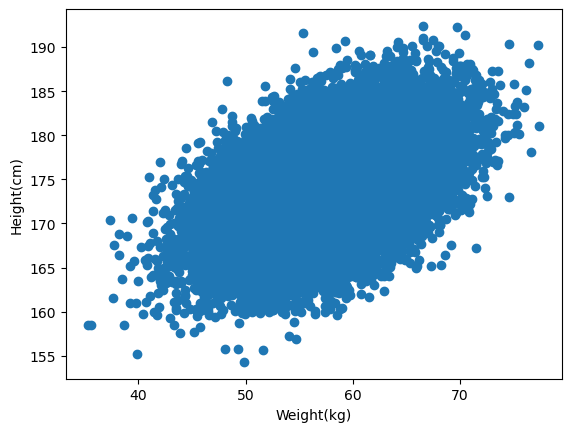

In [26]:
plt.scatter(df['Weight(Kg)'],df['Height(cm)'])
plt.xlabel('Weight(kg)')
plt.ylabel('Height(cm)')
plt.show()

## 1.- Divide into dependant and independant features

In [35]:
#dependant feature
x = df[['Weight(Kg)']]

#independant feature
y = df['Height(cm)']

## 2.- Split Train/Test dataset

In [36]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [41]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20000, 1), (5000, 1), (20000,), (5000,))

## 3.- Standardize the data

### 🤖 Why is it important for **Linear Regression**?

Linear regression learns by assigning **coefficients** (slopes) to each feature. If one feature (e.g., height) has much larger values than another (e.g., age), it can:

- Dominate the learning process
- Lead to inaccurate models
- Make training unstable or slow

**Standardizing**:
- Puts all features on the same scale
- Helps the model converge faster
- Makes the coefficients easier to compare

---

### ✅ Summary

| Without Scaling            | With `StandardScaler`      |
|----------------------------|----------------------------|
| Features on different scales | All features normalized     |
| Slow or unstable learning  | Faster, more stable learning |
| Hard to interpret coefficients | Coefficients more meaningful |


### 🌟 What does `StandardScaler` do?

`StandardScaler` from `scikit-learn` standardizes your data by transforming each feature so that it has:

- **Mean = 0**
- **Standard deviation = 1**

In simple terms:

> It transforms your data so it's centered around zero and all features have the same scale (spread).


In [38]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

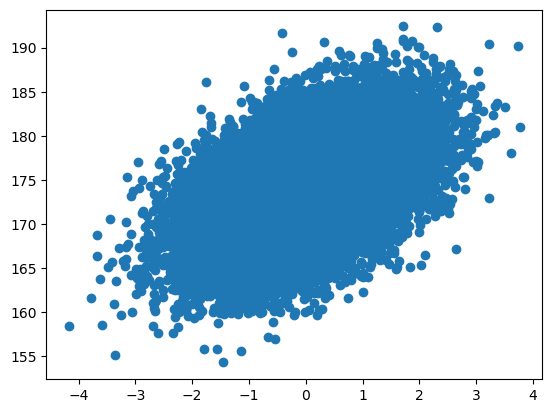

In [65]:
plt.scatter(x_train,y_train)
plt.show()

## 4.- Train Simple Regression Model

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
regressor = LinearRegression()

In [68]:
regressor.fit(x_train,y_train)

LinearRegression()

In [69]:
print('The slope or coefficient of wight is: ',regressor.coef_)
print('Intercept: ', regressor.intercept_)

The slope or coefficient of wight is:  [2.43256656]
Intercept:  174.05528379776


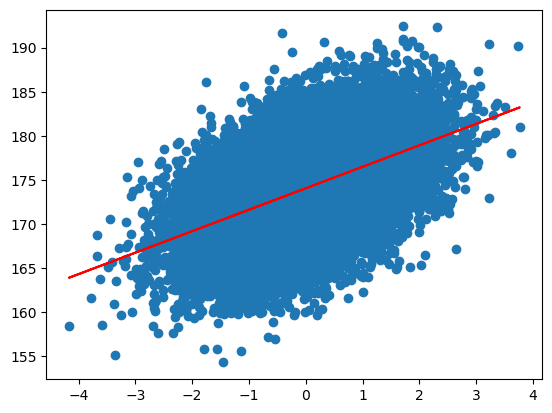

In [70]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train), 'r-')
plt.show()

### Prediction on the Test Data

In [71]:
y_pred_test = regressor.predict(x_test)

In [72]:
y_pred_test,y_test

(array([175.56248977, 170.89514857, 175.91832934, ..., 177.00550538,
        174.56720131, 175.6601909 ]),
 6868     175.166643
 24016    173.815373
 9668     173.207603
 13640    176.673254
 14018    176.667008
             ...    
 8670     176.476851
 11839    172.249318
 4013     175.541709
 21147    171.764787
 695      180.658662
 Name: Height(cm), Length: 5000, dtype: float64)

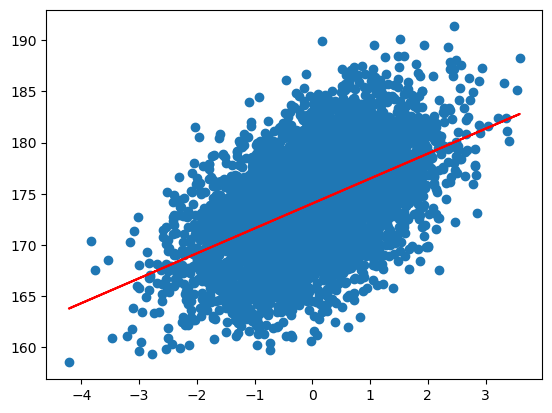

In [73]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test), 'r-')
plt.show()

## Performance Metrics: MSE, MAE, RMSE

### 🔹 1. **Mean Squared Error (MSE)**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

- It measures the **average of the squared differences** between actual and predicted values.
- Squaring makes **large errors** stand out more.
- **Lower MSE = better model**

✅ Good for:
- Emphasizing large errors
- Mathematical convenience (used in optimization)

---

### 🔹 2. **Mean Absolute Error (MAE)**

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n}|y_i - \hat{y}_i|
$$

- Measures the **average absolute difference** between actual and predicted values.
- Less sensitive to outliers than MSE.

✅ Good for:
- Easier interpretation (same units as target)
- Real-world impact assessment (e.g., dollars, meters, etc.)

---

### 🔹 3. **Root Mean Squared Error (RMSE)**

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

- Square root of MSE.
- Brings error back to the **original unit** of the target variable.
- Still penalizes larger errors more than MAE.

✅ Good for:
- Intuitive understanding (same unit as target)
- Highlighting models with fewer large mistakes

---

### 📊 Comparison Table

| Metric | Sensitive to Outliers? | Unit | Interpretation |
|--------|------------------------|------|----------------|
| MSE    | Yes                    | Squared unit | Penalizes large errors |
| MAE    | No                     | Same as target | Average error |
| RMSE   | Yes                    | Same as target | Like MSE, but easier to read |


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [75]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

17.858316507971825
3.3697383857409715
4.225910139599732


### 🔹 4. **R² Score (Coefficient of Determination)**

$$
R^2 = 1 - \frac{SS_\text{res}}{SS_\text{tot}}
$$

- Measures how much of the **variance in the target** is explained by the model.
- Ranges from **0 to 1** (or can be negative if the model is very bad).

✅ Interpretation:
- **1.0** → Perfect fit
- **0.0** → Model predicts the mean
- **< 0.0** → Model is worse than predicting the mean

---




In [76]:
from sklearn.metrics import r2_score

In [ ]:
#R2 score
score = r2_score(y_test,y_pred_test)
print(score)

0.26055631630450127


### 🔹 5. **Adjusted R² Score**

$$
R^2_\text{adj} = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)
$$

Where:
- \( n \) = number of samples
- \( k \) = number of predictors

✅ Why use it?
- **R² always increases** when you add more features (even useless ones)
- **Adjusted R²** penalizes adding unnecessary features
- Helps in **feature selection** and **model comparison**

---


In [78]:
#Adjusted R2 Score
1 - (1-score)*(len(y_test)-1)/(len(y_test) - x_test.shape[1]-1)

0.2604083683885958

### ✅ Summary Table

| Metric         | Good For                          | Penalizes Outliers | Interpretable Unit? | Notes |
|----------------|------------------------------------|---------------------|----------------------|-------|
| **MSE**        | Model training, gradient descent   | ✅ Yes               | ❌ No                | Squared error |
| **MAE**        | Simple average error               | ❌ No                | ✅ Yes               | More robust to outliers |
| **RMSE**       | Human-readable error               | ✅ Yes               | ✅ Yes               | Easier to interpret than MSE |
| **R² Score**   | Variance explained by the model    | ❌ No                | Dimensionless        | Always increases with more features |
| **Adjusted R²**| Fair model comparison              | ❌ No                | Dimensionless        | Penalizes overfitting |

---

## Make predictions

In [79]:
# New data point weight is 80kg
scaled_weight = scaler.transform([[80]])
scaled_weight

/home/danielgp/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[4.2572857]])

In [80]:
regressor.predict([scaled_weight[0]])

array([184.41141466])